In [1]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import folium 
from folium import plugins
import warnings
warnings.filterwarnings('ignore')
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import sklearn
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 20, 8

In [4]:
dataa = pd.read_excel('duomenys.xlsx')
print(dataa.columns)


Index(['Unnamed: 0', 'Borrower ID', 'Credit score', 'Loan amount',
       'Interest rate', 'Loan term', 'default', 'Purpose', 'Monthly payment',
       'Birth year', 'Gender', 'City', 'Marital status', 'Children',
       'Residential status', 'Education', 'Months at current employer', 'DTI',
       'Family income', 'Family liabilities', 'Borrower income',
       'Borrower liabilities'],
      dtype='object')


In [5]:
#Sukuriam kintamuosius X ir y
X = dataa.drop(['default', 'Borrower ID', 'Credit score', 'Interest rate', 'Monthly payment', 'City', 'DTI'], axis = 1)
y = dataa['default']

In [6]:
#Sukuriam dummy kintamuosius
X = pd.get_dummies(X, columns=['Gender', 'Education', 'Marital status', 'Purpose', 'Residential status'])
X

,Unnamed: 0,Loan amount,Loan term,Birth year,Children,Months at current employer,Family income,Family liabilities,Borrower income,Borrower liabilities,...,Purpose_automobiliui,Purpose_kita,Purpose_medicininėms išlaidoms,Purpose_namų remontui,Purpose_paskolų refinansavimui,Purpose_verslui,Residential status_gyvena su tėvais,Residential status_kita,Residential status_nuomojamas,Residential status_nuosavas
0,153,1640,33,1991,0,62,1610.5197,0.00,1610.5197,0.00,...,0,1,0,0,0,0,0,0,0,1
1,227,6000,66,1981,2,4,1261.5074,0.00,1261.5074,0.00,...,0,0,0,1,0,0,0,0,0,1
2,1030,3080,48,1964,0,71,915.7617,0.00,915.7617,0.00,...,0,0,0,0,1,0,0,0,0,1
3,1062,2100,45,1964,0,24,711.6840,0.00,711.6840,0.00,...,0,0,0,1,0,0,0,0,0,1
4,1107,4200,48,1957,0,204,1166.9114,0.00,1166.9114,0.00,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7557,17873,4350,24,1972,0,186,1231.2600,220.59,833.2600,87.00,...,0,1,0,0,0,0,0,0,0,1
7558,17874,2175,24,1970,0,15,431.4300,0.00,431.4300,0.00,...,1,0,0,0,0,0,0,0,0,1
7559,17877,4200,60,1981,3,20,580.7200,0.00,580.7200,0.00,...,0,0,0,0,1,0,0,0,1,0
7560,17878,3745,54,1998,0,7,1148.8800,241.95,1148.8800,241.95,...,0,0,0,0,1,0,1,0,0,0


### Paskaičiuojame y reikšmes, kad pamatytume, jog duomenys labai išbalansuoti

In [7]:
y.value_counts()

0    7041
1     521
Name: default, dtype: int64

### Pamatome duomenų pasiskirstymą

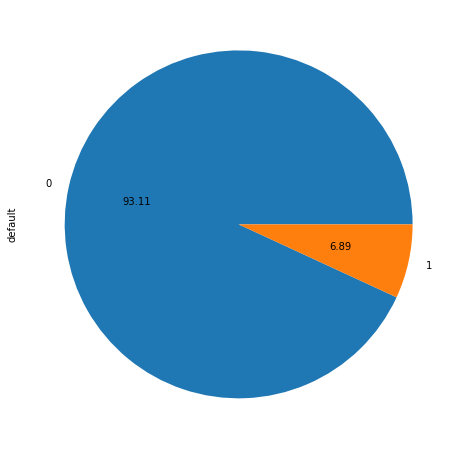

In [8]:
y.value_counts().plot.pie(autopct='%.2f');

### Logistic regression

In [9]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


### Sukuriame train ir test setus

In [10]:
X_train, x_test, y_train, y_test = train_test_split(X, y, random_state=10)

### Scaliname duomenis

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(x_test)

### Darome UnderSampler, pamazinam majority dali

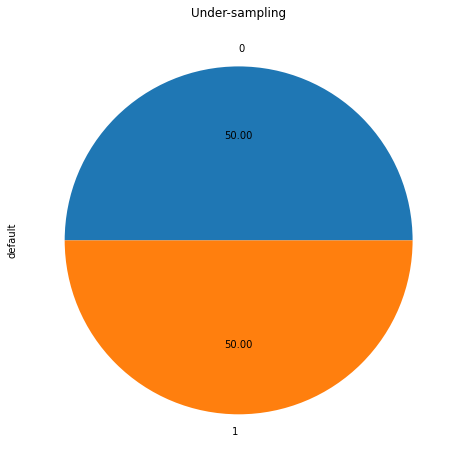

In [12]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy = 1)
X_rus, y_rus = rus.fit_resample(X_train_scaled, y_train)
ax = y_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [13]:
y_rus.value_counts()

0    382
1    382
Name: default, dtype: int64

### Fitinam modelį

In [14]:
log_reg = LogisticRegression()
log_reg.fit(X_rus, y_rus)

LogisticRegression()

In [15]:
y_pred = log_reg.predict(x_test_scaled)

### Sukuriame confusion matrix

In [16]:
cf_matrix = confusion_matrix(y_test, y_pred)

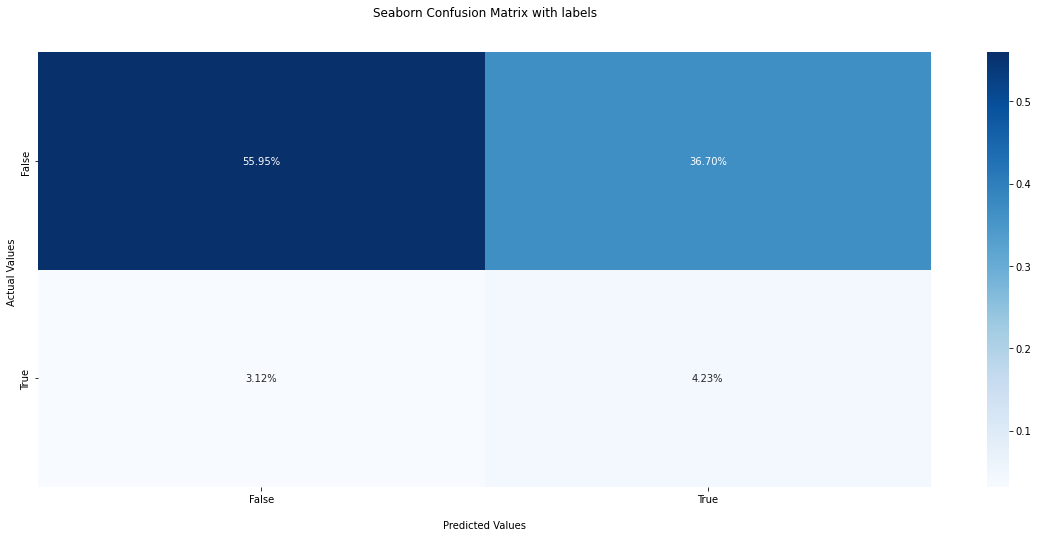

In [17]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Patikriname metrikas 

In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
from sklearn.metrics import roc_auc_score
roc_auc_score = roc_auc_score(y_test, y_pred)
print('roc_auc_score: %f' % roc_auc_score)

Accuracy: 0.601798
Precision: 0.103359
Recall: 0.575540
F1 score: 0.175246
roc_auc_score: 0.589710


### Tikriname coeficientų reikšmingumą

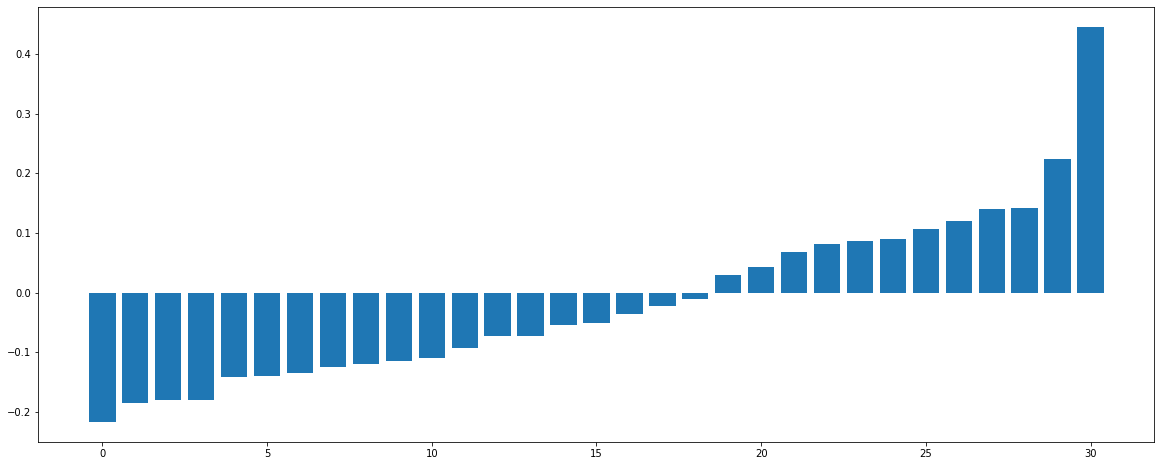

In [19]:
from matplotlib import pyplot

importance=log_reg.coef_[0]
importance=np.sort(importance)
importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [20]:
importance=log_reg.coef_[0]
names = list(X.columns)
sorted(list(zip(names, importance)), key = lambda x: x[1])

[('Loan amount', -0.21712529955899804),
 ('Purpose_medicininėms išlaidoms', -0.1852401973205177),
 ('Months at current employer', -0.18048161793622958),
 ('Borrower income', -0.18022624416793825),
 ('Birth year', -0.14137733117750584),
 ('Gender_moteris', -0.14041967619295248),
 ('Purpose_automobiliui', -0.13423477652396268),
 ('Marital status_susituokęs(-usi)', -0.12568005354333972),
 ('Education_magistras', -0.12051450607640955),
 ('Residential status_kita', -0.11456574416345261),
 ('Residential status_nuosavas', -0.1091652338437909),
 ('Borrower liabilities', -0.09252382761004646),
 ('Family liabilities', -0.07368495330525678),
 ('Education_pagrindinis', -0.07307096423152289),
 ('Purpose_kita', -0.05447796170482684),
 ('Unnamed: 0', -0.051858338182147405),
 ('Marital status_kita', -0.03666449485673541),
 ('Education_aukštasis', -0.023418194577172976),
 ('Purpose_namų remontui', -0.010274208647095513),
 ('Family income', 0.030156003609974065),
 ('Children', 0.04328681588573611),
 ('P